# CSI 4142 - Introduction to Data Science
# Assignment 1: Exploratory Data Analysis

Shacha Parker (300235525)\
Callum Frodsham and (300199446)\
Group 79

In [40]:
# Initial Imports. May not all be useful, but worth
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import kaggle
import kagglehub


## Analysis Reasoning
We're doing the EDA on the following two datasets to familiarize ourselves with the process. (more text here)

<h1 >Dataset 1: Mobile Device Usage and User Behavior</h1>
Author: Vala Khorasani
<br>
Purpose: The purpose of this dataset is to provide insights pertaining to mobile device user behaviour and the connection to their usage patterns.
<br>
Shape: This Data set is composed of 11 Columns, and 700 rows.
<br><br>
Link: <a href="https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset"> Mobile Device Usage and User Behavior</a>
<br>
<h3>Dataset Feature List:</h3>
<ol>
    <li>User ID
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The User ID is a unique ID that is assigned to each mobile device user to track their mobile device usage individually. There are 700 entries, labeled '1' to '700'.
        </li>
    <br>
    <li>Device Model<br>
    Feature Type: Categorical - Nominal<br>
    Description: Model of the User's smartphone.
    </li>
    <br>
    <li>Operating System<br>
    Feature Type: Categorical - Nominal<br>
    Description:Operating system running on the mobile device. Only Android or iOS.
    </li>
    <br>
    <li>App Usage Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Total daily time spent using mobile applications, measured in minutes
    </li>
    <br>
    <li>Screen On Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Average daily duration the screen is active, measured in hours
    </li>
    <br>
    <li>Battery Drain<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Amount of battery consumed daily, measured in milliamp hours (mAh)
    </li>
    <br>
    <li>Number of Apps Installed<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Total number of applications installed on the device
    </li>
    <br>
    <li>Data Usage<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Daily mobile data consumption, measured in megabytes (MB)
    </li>
    <br>
    <li>Age<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Age of the user in years
        </li>
    <br>
    <li>Gender<br>
    Feature Type: Categorical - Nominal (Male/Female)<br>
    Description: Gender of the user
    </li>
    <br>
    <li>User Behaviour Class<br>
    Feature: Categorical - Ordinal<br>
    Description: Classification of user behavior based on usage patterns (1 to 5).
    </li>
</ol>

In [41]:
# Import dataset from Kaggle
# Download latest version
mobileDevicePath = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", mobileDevicePath)

Path to dataset files: C:\Users\larry\.cache\kagglehub\datasets\valakhorasani\mobile-device-usage-and-user-behavior-dataset\versions\1


In [42]:
# generate descriptions of the dataset's features


<h1>Dataset 2: E-Commerce Shipping Data</h1>
Author: Prachi Golpani
<br>
Purpose: The purpose of this dataset is to provide insights based on the shopping data of an international e-commerce business' customers.
<br>
Shape: This Data set is composed of 12 Columns, and 10999 rows.
<br><br>
Link:
<a href="https://www.kaggle.com/datasets/prachi13/customer-analytics"> E-Commerce Shipping Data</a>
<br>
<h3>Dataset Feature List: </h3>
<ol>
    <li>Customer ID:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The Customer ID is a unique ID that is assigned to each customer, allowing the E-commerce business to track the customer's purchases. There are 10999 entries, ranging from 1-10999.
    </li>
    <br>
    <li>Warehouse Block:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: A Warehouse block is a division of the shipping e-commerce business' warehouse. There are 5 blocks labelled A,B,C,D,F. The specific block designates where a product was stored in the e-commerce warehouse. 
        </li>
    <br>
    <li>Mode of Shipment:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The mode of shipment describes the shipping method used to deliver the product to the customer. There are 3 modes of shipment: road, flight, and ship. 
        </li>
    <br>
    <li>Customer Care Calls:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Customer Care Calls provides the number of times a customer called the e-commerce business to inquire about the product, and anything related to the process of purchase and delivery.
        </li>
    <br>
    <li>Customer Rating:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: The customer rating represents the rating given by the customer to the e-commerce business regarding the product(s) purchased, the delivery experience, and the ordering process for that specific order. The rating ranges from 1-5, 1 indicating the most negative experience, and 5 being the most positive experience.
        </li>
    <br>
    <li>Cost of Product:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The cost of the product is the value of the product in USD. 
        </li>
    <br>
    <li>Prior Purchases:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Prior Purchases represents the number of times a customer has previously purchased a product from the e-commerce business.
        </li>
    <br>
    <li>Product Importance:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: Product Importance is the level of importance the e-commerce business has placed on a specific product. The importance scale has values: low, medium, and high. Low denoting the lowest importance, medium denoting the mid level importance, and high denoting the most important.
        </li>
    <br>
    <li>Gender:
    <br>
    Feature Type: Categorical - Nominal (Male/Female)
    <br>
    Description: The Gender of the customer.
        </li>
    <br>
    <li>Discount Offered:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Discount offered is the percentage reduction in price of the product purchased.
        </li>
    <br>
    <li>Weight In Grams:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The weight of the product measured in grams.
        </li>
    <br>
    <li>Reached on Time:
    <br>
    Feature Type: Categorical - Nominal (0/1)
    <br>
    Description: A binary value indicating if the product reached its intended destination on time. 0 means the product did not reach on time, and 1 means that the product did.
        </li>
</ol>

In [50]:
# Retrieve Latest version of the e-commerce dataset from kaggle
ec_dataset_path = kagglehub.dataset_download("prachi13/customer-analytics")
print("Path to dataset: ", ec_dataset_path)

# Get the path of the dataset csv
# Walk along the directory to get the csv filename
for root, dirs, files in os.walk(ec_dataset_path):
    for filename in files:
        ec_dataset_path = os.path.join(ec_dataset_path, filename)

# Converting the csv into dataframe
ec_dataframe = pd.read_csv(ec_dataset_path)

Path to dataset:  C:\Users\larry\.cache\kagglehub\datasets\prachi13\customer-analytics\versions\1


<h2>E-Commerce Dataset Insights:</h2>
<h5>Insight 1:</h5>
Filler text blah blah blah insight insight filler

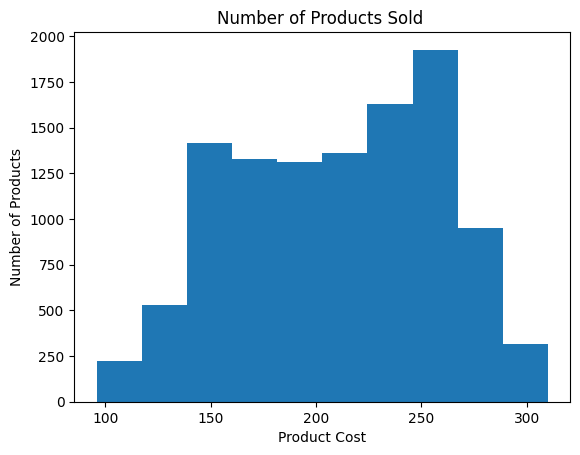

In [54]:
# Use the newly created dataframe to create a histogram of the 
plt.hist(ec_dataframe["Cost_of_the_Product"])
plt.title("Number of Products Sold ")
plt.xlabel("Product Cost")
plt.ylabel("Number of Products")
plt.show()